In [1]:
#Import Limphoma_Microarray.csv file
import pandas as pd
import numpy as np

# Outcome of Interest (class): 58 Diffuse large B-cell (1); 19 follicular lymphoma (0)

df_fp = pd.read_csv("Limphoma_Microarray.csv", sep=",")
df_fp = df_fp.drop('id',axis=1)
df_fp

,A28102_at,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000462_at,AB000905_at,AB001106_at,AB001325_at,AB002314_at,...,Z78290_at,Z78291_at,Z80780_f_at,Z83336_at,Z84497_s_at,Z84721_cds2_at,Z96810_at,Z97054_xpt2_at,Z97074_at,class
0,766.641438,555.720641,691.214533,541.307724,1071.146880,792.385579,619.781103,1025.738198,2779.694245,1700.876595,...,530.935458,792.386891,943.022578,2015.213350,1543.697899,905.578221,580.771046,955.626595,707.119503,1
1,773.865121,422.732757,856.915398,499.503064,1011.280030,617.507703,505.821700,655.536193,1843.701009,766.059861,...,343.393956,645.725704,974.032487,1616.648782,949.922140,3936.153114,472.418713,1272.108045,783.978554,1
2,1405.578179,600.159750,694.416481,603.836308,1044.097223,967.313015,717.910395,721.028208,2703.723537,867.727801,...,448.760272,828.594555,1050.967660,1709.782968,1332.655612,1319.648120,583.712057,791.795105,748.638380,1
3,998.368321,454.351773,761.426765,430.826342,1374.274472,988.899602,826.692307,594.652405,2135.669535,630.307428,...,452.216029,822.799022,1415.209203,1928.461252,1243.863285,2064.441780,449.752520,1373.169909,967.288647,1
4,1196.410368,837.224699,1037.254172,839.575270,1494.958842,1017.309575,810.960716,1761.303323,2476.553302,1837.374065,...,390.908109,638.825417,1304.754746,1538.822713,1568.696006,954.599133,507.218794,1757.786262,904.119880,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,715.334712,521.978990,868.721379,545.226945,1241.448009,893.799889,727.559476,1314.202356,2405.474560,890.909971,...,696.451067,1392.073303,1375.191506,1992.752235,1534.930747,969.386619,652.320983,952.216022,1394.317578,0
73,1469.582552,864.323464,1097.449801,877.149345,1518.529512,1310.957017,934.490446,1089.725369,2616.695315,1780.554584,...,391.279377,787.590617,1138.129454,1487.264985,2133.514402,1147.144259,538.414956,1063.618712,716.939115,0
74,773.449718,574.023235,683.639082,557.992828,1082.058385,995.836993,571.723012,855.078651,2054.126204,606.404065,...,352.764014,759.073079,956.653664,1605.258162,1756.908968,3155.294621,468.296912,1307.294600,771.630292,0
75,1051.385520,635.089523,807.437439,759.467597,1288.913105,998.513907,706.920273,918.844430,2446.185425,872.564528,...,453.422201,817.909763,1090.112573,1742.877172,1586.933774,964.280524,659.021178,853.967632,734.264437,0


In [2]:
#Check if outcome variable is imbalanced
df_fp['class'].value_counts()

1    58
0    19
Name: class, dtype: int64

As data is imbalanced (58:19), need to keep this in mind when looking at sensitivity and specificity

In [3]:
#Creating separate arrays for the features and outcome to split
df_features = df_fp.drop('class',axis=1).values
df_outcome = df_fp['class'].values

In [4]:
# Normalizing data for KNN Between 0 and 1
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_features = min_max_scaler.fit_transform(df_features)
df_features

array([[0.10566513, 0.16040906, 0.02684332, ..., 0.16150763, 0.11309102,
        0.1019085 ],
       [0.10902269, 0.04248828, 0.04887435, ..., 0.06981357, 0.22398458,
        0.1457849 ],
       [0.40264295, 0.19981336, 0.02726904, ..., 0.16399648, 0.05568526,
        0.12561031],
       ...,
       [0.10882961, 0.17663803, 0.02583612, ..., 0.06632546, 0.23631378,
        0.13873567],
       [0.23801419, 0.2307857 , 0.04229593, ..., 0.22772745, 0.07747021,
        0.11740468],
       [0.21512858, 0.2879318 , 0.05635882, ..., 0.07249306, 0.03056639,
        0.12178783]])

In [5]:
#Splitting data into test (20%) and train (80%)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_features, df_outcome, test_size=0.2, random_state=42)

In [6]:
#Checking 
print(x_train.shape)
print(y_train.shape)

(61, 2647)
(61,)


In [7]:
#Importing tools from sklearn for KNN (and also rest of models)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Text(0, 0.5, 'Accuracy')

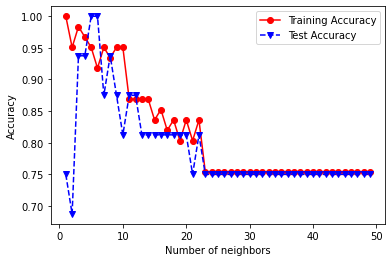

In [8]:
# Create a list of k neighbors to test from 1-50
numNeighbors = list(range(1, 50))
# Empty list to store training accuracy
trainAcc = []
# Empty list to store testing accuracy
testAcc = []

#Gain accuracy values for test and train at different k by numNeighbors list
import matplotlib.pyplot as plt
for k in numNeighbors:
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    knn.fit(x_train, y_train)
    
    # predicted values for x_train
    y_predtrain = knn.predict(x_train)
    
    # accuracy scores against Y_train
    trainAcc.append(accuracy_score(y_train, y_predtrain))
    
    # predicted values for x_test
    y_predtest = knn.predict(x_test)

    # accuracy scores against Y_test
    testAcc.append(accuracy_score(y_test, y_predtest))
    
#Line plot of accuracy vs k by test and train set
plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

K=8 seems to be the optimal # of k

In [9]:
#Creating KNN model with k=8
knn2 = KNeighborsClassifier(n_neighbors=8, metric='minkowski', p=2)

In [10]:
#Accuracy score for model with k=8
knn2.fit(x_train, y_train)
knn2.score(x_test,y_test)

0.9375

In [11]:
#Crosstab for model with k=8
y_pred = knn2.predict(x_test)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,4,0,4
1,1,11,12
All,5,11,16


In [12]:
#Classification report for sensitivity, specificity, accuracy, and F1
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.92      0.96        12

    accuracy                           0.94        16
   macro avg       0.90      0.96      0.92        16
weighted avg       0.95      0.94      0.94        16



Interpretation:
Accuracy: 94%
Sensitivity: 100%
Specificity: 80%
F1: 96%
    
This model had no false positives. The F1 score of 96% is high.

In [13]:
#Preparation for ROC curve
y_pred_proba = knn2.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

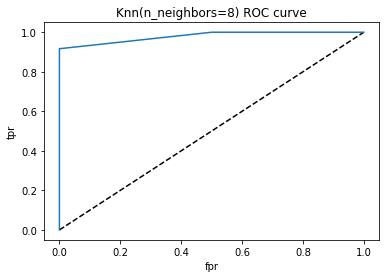

In [14]:
#Plotting ROC curve to find area underneath
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=8) ROC curve')
plt.show()

In [15]:
print(roc_auc_score(y_test,y_pred_proba))

0.9791666666666666


In [16]:
#Naive Bayes
#Using Gaussian method as covariates are all continuous
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train, y_train)
y_pred =gnb.predict(x_test)

In [17]:
#Creating crosstab to see TP, TN, FP, FN
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,3,1,4
1,2,10,12
All,5,11,16


In [18]:
#Classification report for sensitivity, specificity, accuracy, and F1 for Naive Bayes Model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.91      0.83      0.87        12

    accuracy                           0.81        16
   macro avg       0.75      0.79      0.77        16
weighted avg       0.83      0.81      0.82        16



Interpretation: 
Accuracy: 81%
Sensitivity: 91%
Specificity: 60%
F1: 87%

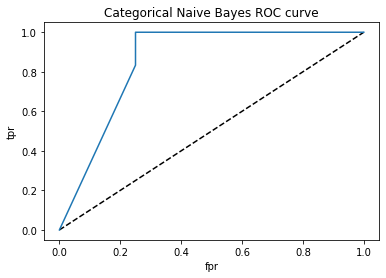

0.8541666666666666

In [20]:
#Creating and plotting ROC curve for Naive Bayes Model
from sklearn.metrics import roc_curve
y_pred_proba = gnb.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Categorical Naive Bayes')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Categorical Naive Bayes ROC curve')
plt.show()

#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

Accuracy on training set: 1.000
Accuracy on test set: 0.688


Text(0, 0.5, 'Accuracy')

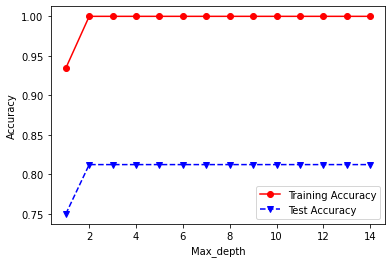

In [21]:
#Decision Tree Model
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
dt = tree.DecisionTreeClassifier()
dt = dt.fit(x_train, y_train)
dt
print("Accuracy on training set: {:.3f}".format(dt.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(x_test, y_test)))
#list of max_depth
max_depthlist = list(range(1,15))
# Empty list to store training accuracy
trainAcc = []
# Empty list to store testing accuracy
testAcc = []

#loop for collecting training and testing accuracies for varying max_depth
for k in max_depthlist:
    dt = tree.DecisionTreeClassifier(max_depth=k,random_state=42)
    dt = dt.fit(x_train, y_train)
    y_predTrain = dt.predict(x_train)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    y_predTest = dt.predict(x_test)
    testAcc.append(accuracy_score(y_test, y_predTest))
    # end of for loop statement

#Plotting accuracy by max depth for decision tree
plt.plot(max_depthlist, trainAcc, 'ro-', max_depthlist, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')

In [22]:
#import GridSearchCV to tune max_depth
from sklearn.model_selection import GridSearchCV
# the parameter to be tuned is max_depth
param_grid_depth = {'max_depth':np.arange(1,15,2)} # get a list of depth parameters
tree = DecisionTreeClassifier(random_state=42)
tree_cv_depth= GridSearchCV(tree,param_grid_depth,cv=10)
tree_cv_depth.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': array([ 1,  3,  5,  7,  9, 11, 13])})

In [23]:
print(tree_cv_depth.best_score_)
print(tree_cv_depth.best_params_)

0.8857142857142858
{'max_depth': 1}


In [24]:
#GridSearchCV to tune min_samples_split
param_grid_split = {'min_samples_split':np.arange(5,60,5)} # get a list of minimum samples split starting with 10 , end 50 and increment with 5
tree = DecisionTreeClassifier(random_state=42)
tree_cv_split= GridSearchCV(tree,param_grid_split,cv=10)
tree_cv_split.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'min_samples_split': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55])})

In [25]:
print(tree_cv_split.best_score_)
print(tree_cv_split.best_params_)

0.8857142857142858
{'min_samples_split': 45}


In [26]:
#Running model w/ best parameters from above
tree_final = DecisionTreeClassifier(max_depth=1, min_samples_split= 45,random_state=42)
tree_final.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=1, min_samples_split=45, random_state=42)

In [27]:
#Confusion Matrix
y_pred =tree_final.predict(x_test)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1,3,4
1,1,11,12
All,2,14,16


In [28]:
#Finding the Accuracy of Test set
accuracy = tree_final.score(x_test,y_test);
print(accuracy)

0.75


In [29]:
important_features_dict = {}
for x,i in enumerate(tree_final.feature_importances_):
    important_features_dict[x]=i

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

In [30]:
# get the sorted feature list based on importance scores

# create an empty dictionary of features and importance scores
featureImpList= []
feature_names=list(df_fp.columns)

for feat, importance in zip(feature_names, tree_final.feature_importances_):  
    temp = [feat, importance*100]
    featureImpList.append(temp)

# create a dataframe
fT_df = pd.DataFrame(featureImpList, columns = ['Feature', 'Importance'])

# sort the values
fT_df_sorted = fT_df.sort_values('Importance', ascending = False)
print (fT_df_sorted)


               Feature  Importance
2237         X65550_at       100.0
0            A28102_at         0.0
1767         U57721_at         0.0
1759         U55936_at         0.0
1760       U56402_s_at         0.0
...                ...         ...
883          L76191_at         0.0
884          L76200_at         0.0
885        L76528_s_at         0.0
886   L76568_xpt3_f_at         0.0
2646         Z97074_at         0.0

[2647 rows x 2 columns]


In [31]:
#Classification report for sensitivity, specificity, accuracy, and F1 for Decision Tree Model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.79      0.92      0.85        12

    accuracy                           0.75        16
   macro avg       0.64      0.58      0.59        16
weighted avg       0.71      0.75      0.72        16



Interpretation:
Accuracy: 75%
Sensitivity: 79%
Specificity: 50%
F1: 85%

In [32]:
#Creating Random Forest Model; testing with 100 estimators
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(x_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [33]:
#import GridSearchCV to tune max_depth
from sklearn.model_selection import GridSearchCV
# the parameter to be tuned is max_depth
param_grid_depth = {'max_depth':np.arange(1,15,2)} # get a list of depth parameters
tree = RandomForestClassifier(random_state=42)
tree_cv_depth= GridSearchCV(tree,param_grid_depth,cv=10)
tree_cv_depth.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': array([ 1,  3,  5,  7,  9, 11, 13])})

In [34]:
#GridSearchCV to tune min_samples_split
param_grid_split = {'min_samples_split':np.arange(5,60,5)} # get a list of minimum samples split starting with 10 , end 50 and increment with 5
tree = RandomForestClassifier(random_state=42)
tree_cv_split= GridSearchCV(tree,param_grid_split,cv=10)
tree_cv_split.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'min_samples_split': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55])})

In [35]:
#GridSearchCV to tune number of trees
param_grid_estimate = {'n_estimators':np.arange(5,100,5)}
tree = RandomForestClassifier(random_state=42)
tree_cv_estim = GridSearchCV(tree,param_grid_estimate,cv=10)
tree_cv_estim.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])})

In [36]:
#Printing the best paramet values from GridSearchCV
print(tree_cv_depth.best_score_)
print(tree_cv_depth.best_params_)
print(tree_cv_split.best_score_)
print(tree_cv_split.best_params_)
print(tree_cv_estim.best_score_)
print(tree_cv_estim.best_params_)

0.9023809523809525
{'max_depth': 5}
0.9023809523809525
{'min_samples_split': 10}
0.9333333333333333
{'n_estimators': 10}


Text(0, 0.5, 'Accuracy')

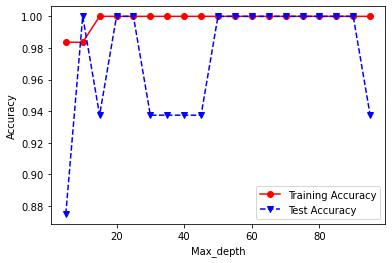

In [37]:
# Empty list to store training accuracy
trainAcc = []
# Empty list to store testing accuracy
testAcc = []

#Plot for training and test accuracy w varying n_estimators
estimators_list = list(range(5,100,5))
for k in estimators_list:
    rf = RandomForestClassifier(n_estimators=k,random_state=0)
    rf = rf.fit(x_train, y_train)
    
    y_predtrain = rf.predict(x_train)
    trainAcc.append(accuracy_score(y_train, y_predtrain))
    y_predtest = rf.predict(x_test)
    testAcc.append(accuracy_score(y_test, y_predtest))
    
    
    # end of for loop statement

plt.plot(estimators_list, trainAcc, 'ro-', estimators_list, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')

In [38]:
#Creating final Random Forest Model based on tuned parameters
rf_final = RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=10, random_state=42, oob_score=bool)
rf_final.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(x_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.938


In [39]:
#Generating crosstab to find TP, TN, FP, FN
y_pred =rf_final.predict(x_test)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,4,0,4
1,1,11,12
All,5,11,16


In [40]:
#Finding the Accuracy, sensitivity, and specificity
accuracy = rf_final.score(x_test,y_test);
print(accuracy)
print(classification_report(y_test,y_pred))

0.9375
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.92      0.96        12

    accuracy                           0.94        16
   macro avg       0.90      0.96      0.92        16
weighted avg       0.95      0.94      0.94        16



Interpretation:
Accuracy: 94%
Sensitivity: 100%
Specificity: 80%
F1: 96%